In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df = pd.read_csv("train_essays.csv") 
new_train = pd.read_csv("train_drcat_02.csv")
human=df[df['generated']==0]
ai=df[df['generated']==1]

print('human Percentage =',(len(human)/len(df))*100,'%')

print('ai Percentage =',(len(ai)/len(df))*100,'%')

human Percentage = 99.7822931785196 %
ai Percentage = 0.21770682148040638 %


In [4]:
new_train.drop_duplicates('text', inplace=True)

In [5]:
org_train = df[["text", "generated"]]
positive = new_train.loc[new_train['label'] == 1][["text", "label"]]
positive = positive.rename(columns={"text": "text", "label": "generated"})
positive

,text,generated
0,"Okay, here is my essay:\n\nWorking or doing th...",1
3,One example of an inspiring individual who has...,1
6,"""As a high school student, I have witnessed th...",1
11,Video games have been a popular form of entert...,1
13,Group work is an essential part of life; it ca...,1
...,...,...
39767,Sure thing! Here's my attempt at writing an es...,1
39770,I think our principal's idea of making us do e...,1
39771,I think it's a good idea for schools to have o...,1
39778,Advantages of Limiting Car Usage\n\nLimiting c...,1


In [6]:
negative = new_train.loc[new_train['label'] == 0][["text", "label"]]
negative = negative.rename(columns={"text": "text", "label": "generated"})
negative

,text,generated
1,"Dear Principal,\r\n\r\nI just want to let you ...",0
2,I believe they should change the voting to pop...,0
4,"Dear Mr. Principal,\n\nI believe that students...",0
5,I think that this image of this face is very n...,0
7,"Dear Principle,\n\nI sincerely hope you will n...",0
...,...,...
39779,Are driverless cars really necessary? Most of ...,0
39780,"""Oh man I didn't make the soccer team!"", yelle...",0
39781,I believe that using this technology could be ...,0
39783,Texting & Driving\n\nUsing your phone while dr...,0


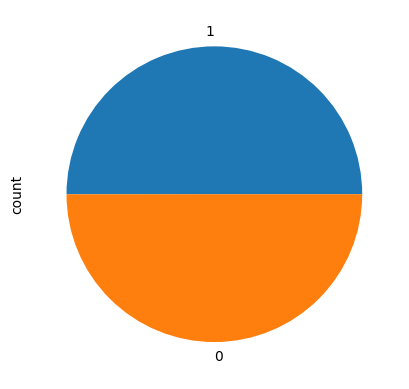

In [7]:
data = pd.concat([org_train, positive, negative.sample(8618)])
data = data.sample(frac=1).reset_index(drop=True)
data['generated'].value_counts().plot.pie();

In [8]:
data.shape

(19989, 2)

1. multinomial NB

<Axes: >

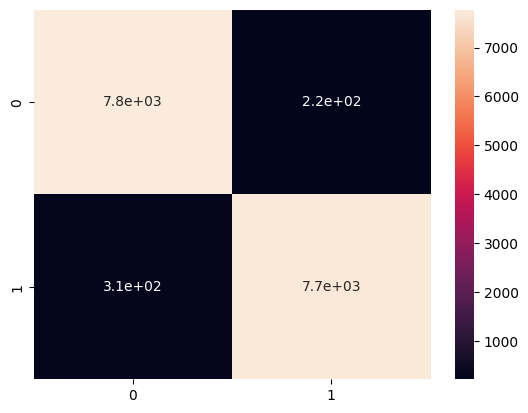

In [9]:
# set random seed
np.random.seed(0)
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

vectorizer=CountVectorizer()
#you can also try tfidf vectorizer
ai_countVectorizer=vectorizer.fit_transform(data['text'])

X=ai_countVectorizer
y=data['generated']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

y_predict_train=NB_classifier.predict(X_train)
cm=confusion_matrix(y_train,y_predict_train)

sns.heatmap(cm,annot=True)


In [10]:
# train accuracy
from sklearn.metrics import accuracy_score
accuracy_train=accuracy_score(y_train,y_predict_train)
print('train accuracy =',accuracy_train)

train accuracy = 0.9670439622287537


In [11]:
#recall rate
from sklearn.metrics import recall_score
recall_train=recall_score(y_train,y_predict_train)
print('train recall =',recall_train)

train recall = 0.9616106039764912


[1 1 0 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1999
           1       0.97      0.96      0.97      1999

    accuracy                           0.97      3998
   macro avg       0.97      0.97      0.97      3998
weighted avg       0.97      0.97      0.97      3998



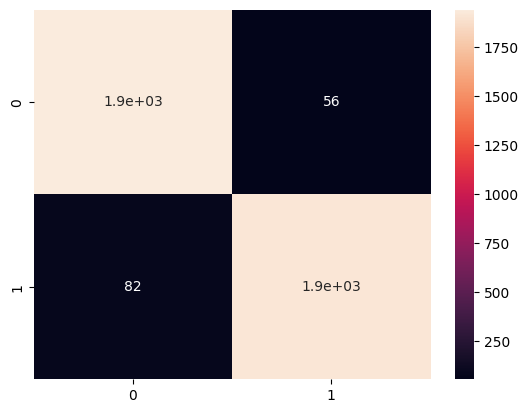

In [12]:


y_predict_test=NB_classifier.predict(X_test)
print (y_predict_test)

cm=confusion_matrix(y_test,y_predict_test)


sns.heatmap(cm,annot=True)

print(classification_report(y_test,y_predict_test))


In [13]:
test_accuracy=accuracy_score(y_test,y_predict_test)
print('test accuracy =',test_accuracy)

test accuracy = 0.9654827413706853


In [14]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

def preprocess(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and stop words, and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word not in string.punctuation and word.lower() not in stop_words]
    return ' '.join(tokens)

documents_preprocessed = [preprocess(doc) for doc in data['text']]


vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents_preprocessed)


X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['generated'], test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on test data
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9307153576788394


In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


# Compute TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['text'])

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['generated'], test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on test data
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9462231115557779


In [9]:
# set random seed
np.random.seed(0)

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()
ai_countVectorizer=vectorizer.fit_transform(data['text'])

X=ai_countVectorizer
y=data['generated']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [18]:
nb_model = MultinomialNB()


# parameter grid
param_grid = {'alpha': [0.0001, 0.005, 0.001, 0.01, 0.1, 1, 10, 100]}
# import grid search
from sklearn.model_selection import GridSearchCV

# Initialize Grid Search Model
model = GridSearchCV(estimator=nb_model, param_grid=param_grid, scoring='f1',
                                 verbose=10, n_jobs=-1, refit=True, cv=2)

# Fit Grid Search Model
model.fit(X_train,y_train)  # we can use the full data here but im only using xtrain. 
print("Best score: %0.3f" % model.best_score_)
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2; 3/8] START alpha=0.001.................................................
[CV 2/2; 4/8] START alpha=0.01..................................................
[CV 2/2; 1/8] START alpha=0.0001................................................
[CV 1/2; 2/8] START alpha=0.005.................................................
[CV 1/2; 4/8] START alpha=0.01..................................................
[CV 1/2; 1/8] START alpha=0.0001................................................
[CV 2/2; 3/8] START alpha=0.001.................................................
[CV 2/2; 2/8] START alpha=0.005.................................................
[CV 2/2; 4/8] END ...................alpha=0.01;, score=0.957 total time=   0.1s
[CV 2/2; 3/8] END ..................alpha=0.001;, score=0.959 total time=   0.1s
[CV 1/2; 2/8] END ..................alpha=0.005;, score=0.951 total time=   0.1s
[CV 1/2; 3/8] END ..................alpha=0.001;,

In [30]:
best_modelnb = MultinomialNB(alpha=0.0001)
best_modelnb.fit(X_train, y_train)
predictions = best_modelnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9587293646823412


In [22]:
# logistic regression
#set random seed
np.random.seed(0)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Logistic Regression Model
logreg_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True)
logreg_model.fit(X_train, y_train)
predictions = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9867433716858429


In [23]:
# print confusion matrix
print(confusion_matrix(y_test, predictions))

[[1974   25]
 [  28 1971]]


In [24]:
# do a grid search on logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Initialize Grid Search Model
model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='f1',
                                 verbose=10, n_jobs=-1, refit=True, cv=10)
model.fit(X_train,y_train)  # we can use the full data here but im only using xtrain. 
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 2/10; 1/7] START C=0.001....................................................
[CV 4/10; 1/7] START C=0.001....................................................[CV 1/10; 1/7] START C=0.001....................................................

[CV 5/10; 1/7] START C=0.001....................................................
[CV 3/10; 1/7] START C=0.001....................................................
[CV 7/10; 1/7] START C=0.001....................................................
[CV 6/10; 1/7] START C=0.001....................................................
[CV 8/10; 1/7] START C=0.001....................................................
[CV 2/10; 1/7] END .....................C=0.001;, score=0.917 total time=   0.7s
[CV 9/10; 1/7] START C=0.001....................................................
[CV 8/10; 1/7] END .....................C=0.001;, score=0.917 total time=   0.7s
[CV 10/10; 1/7] START C=0.001...................

/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/10; 6/7] START C=100......................................................
[CV 5/10; 5/7] END ........................C=10;, score=0.992 total time=   3.9s
[CV 3/10; 6/7] START C=100......................................................
[CV 6/10; 5/7] END ........................C=10;, score=0.992 total time=   3.6s
[CV 4/10; 6/7] START C=100......................................................
[CV 7/10; 5/7] END ........................C=10;, score=0.999 total time=   3.5s
[CV 5/10; 6/7] START C=100......................................................


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 8/10; 5/7] END ........................C=10;, score=0.992 total time=   3.9s
[CV 6/10; 6/7] START C=100......................................................
[CV 9/10; 5/7] END ........................C=10;, score=0.996 total time=   3.3s
[CV 7/10; 6/7] START C=100......................................................
[CV 10/10; 5/7] END .......................C=10;, score=0.995 total time=   3.8s
[CV 8/10; 6/7] START C=100......................................................


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV 1/10; 6/7] END .......................C=100;, score=0.996 total time=   3.8s
[CV 9/10; 6/7] START C=100......................................................
[CV 2/10; 6/7] END .......................C=100;, score=0.994 total time=   3.7s
[CV 10/10; 6/7] START C=100.....................................................


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV 3/10; 6/7] END .......................C=100;, score=0.997 total time=   3.9s
[CV 1/10; 7/7] START C=1000.....................................................
[CV 4/10; 6/7] END .......................C=100;, score=0.994 total time=   4.0s
[CV 5/10; 6/7] END .......................C=100;, score=0.994 total time=   3.8s
[CV 2/10; 7/7] START C=1000.....................................................
[CV 3/10; 7/7] START C=1000.....................................................


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/10; 6/7] END .......................C=100;, score=0.994 total time=   4.3s
[CV 4/10; 7/7] START C=1000.....................................................


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/10; 6/7] END .......................C=100;, score=0.998 total time=   4.0s
[CV 5/10; 7/7] START C=1000.....................................................


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 8/10; 6/7] END .......................C=100;, score=0.994 total time=   3.8s
[CV 6/10; 7/7] START C=1000.....................................................


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV 10/10; 6/7] END ......................C=100;, score=0.997 total time=   3.8s
[CV 9/10; 6/7] END .......................C=100;, score=0.996 total time=   3.9s
[CV 7/10; 7/7] START C=1000.....................................................
[CV 8/10; 7/7] START C=1000.....................................................


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV 1/10; 7/7] END ......................C=1000;, score=0.996 total time=   4.0s
[CV 9/10; 7/7] START C=1000.....................................................
[CV 3/10; 7/7] END ......................C=1000;, score=0.997 total time=   4.0s
[CV 2/10; 7/7] END ......................C=1000;, score=0.996 total time=   4.0s
[CV 10/10; 7/7] START C=1000....................................................


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV 4/10; 7/7] END ......................C=1000;, score=0.994 total time=   3.8s
[CV 5/10; 7/7] END ......................C=1000;, score=0.995 total time=   3.7s


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/10; 7/7] END ......................C=1000;, score=0.993 total time=   3.5s


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV 8/10; 7/7] END ......................C=1000;, score=0.994 total time=   3.1s
[CV 7/10; 7/7] END ......................C=1000;, score=0.998 total time=   3.2s


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV 9/10; 7/7] END ......................C=1000;, score=0.997 total time=   2.7s
[CV 10/10; 7/7] END .....................C=1000;, score=0.998 total time=   2.6s
	C: 1000


/Users/bunbun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
best_parameters

{'C': 1000,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [10]:
best_parameters = {'C': 1000,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
best_model = LogisticRegression(**best_parameters)
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9959979989994997


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# confusion matrix
print(confusion_matrix(y_test, predictions))

[[1989   10]
 [   6 1993]]


countvec work better w/ NB. log work well w/ tf

We now tell gpt4 to generate 10 essays based on prompt in train data. successfully detected all essays.

In [27]:
gpt = pd.read_csv('test_gpt.csv')
gpt = vectorizer.transform(gpt['text'])
gpt_pred = best_model.predict(gpt)
print(gpt_pred)

[1 1 1 1 1 1 1 1 1]


In [44]:
gpt = pd.read_csv('gpt_morehuman.csv')
gpt = vectorizer.transform(gpt['text'])
gpt_pred = best_model.predict(gpt)
print(sum(gpt_pred)/10)

0.6


when we tell gpt4 to act more human and less robotic, it significantly decreased our accuracy.

In [47]:
test_lda_1 = pd.read_csv('train_drcat_lda.csv')
test_lda_1.describe()

,label,fold,lda_topic
count,39785.000000,39785.000000,39785.000000
mean,0.251175,4.499686,1.476838
std,0.433694,2.872317,0.691451
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000
50%,0.000000,4.000000,2.000000
75%,1.000000,7.000000,2.000000
max,1.000000,9.000000,2.000000


In [46]:
test_lda = vectorizer.transform(test_lda_1['text'])
test_lda_pred = best_model.predict(test_lda)
print('accuracy =',accuracy_score(test_lda_1['label'], test_lda_pred))

accuracy = 0.9967827070503958


In [51]:
# test in different lda_topic
lda_range = [0,1,2]
for i in lda_range:
    test_lda_data = pd.read_csv('train_drcat_lda.csv')
    test_lda_slice = test_lda_data[test_lda_data['lda_topic'] == i]
    test_lda = vectorizer.transform(test_lda_slice['text'])
    test_lda_pred = best_model.predict(test_lda)
    print('lda_topic:', i, 'accuary:', accuracy_score(test_lda_slice['label'], test_lda_pred))

lda_topic: 0 accuary: 0.9997801231310466
lda_topic: 1 accuary: 0.9985492404847244
lda_topic: 2 accuary: 0.9953229303967005
